# 2022_15min_data.csv Models

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn as sk
import pandas as pd

In [19]:
df_pv_GHI = pd.read_csv('core\\static\\data\\2022_15min_data_with_GHI.csv', sep=',', low_memory=False)

In [20]:
df_pv_GHI.head()

,PV Productie (W),DateTime,GHI (W/m^2),Year,Month,Day,Hour,Minute,Second
0,0.0,2021-12-26 00:00:00,0.0,2021,12,26,0,0,0
1,0.0,2021-12-26 00:15:00,0.0,2021,12,26,0,15,0
2,0.0,2021-12-26 00:30:00,0.0,2021,12,26,0,30,0
3,0.0,2021-12-26 00:45:00,0.0,2021,12,26,0,45,0
4,0.0,2021-12-26 01:00:00,0.0,2021,12,26,1,0,0


In [21]:
df_pv_GHI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   PV Productie (W)  33600 non-null  float64
 1   DateTime          33600 non-null  object 
 2   GHI (W/m^2)       33600 non-null  float64
 3   Year              33600 non-null  int64  
 4   Month             33600 non-null  int64  
 5   Day               33600 non-null  int64  
 6   Hour              33600 non-null  int64  
 7   Minute            33600 non-null  int64  
 8   Second            33600 non-null  int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 2.3+ MB


In [22]:
df_pv_GHI['DateTime'] = pd.to_datetime(df_pv_GHI['DateTime'])

In [23]:
df_pv_GHI.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   PV Productie (W)  33600 non-null  float64       
 1   DateTime          33600 non-null  datetime64[ns]
 2   GHI (W/m^2)       33600 non-null  float64       
 3   Year              33600 non-null  int64         
 4   Month             33600 non-null  int64         
 5   Day               33600 non-null  int64         
 6   Hour              33600 non-null  int64         
 7   Minute            33600 non-null  int64         
 8   Second            33600 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6)
memory usage: 2.3 MB


In [24]:
df_pv_GHI.isnull().any()


PV Productie (W)    False
DateTime            False
GHI (W/m^2)         False
Year                False
Month               False
Day                 False
Hour                False
Minute              False
Second              False
dtype: bool

## Regression

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
#maybe use scaler?

X = df_pv_GHI[['Month', 'Day', 'Hour', 'Minute', 'GHI (W/m^2)']]
y = df_pv_GHI['PV Productie (W)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Linear Regression:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = DecisionTreeRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Decision Tree Regression:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = RandomForestRegressor(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Random Forest:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

Linear Regression:
mean squared error: 133828.17177795636
root mean squared error: 365.82532960137735
r2 score: 0.4067401055388381

Decision Tree Regression:
mean squared error: 55874.36257745038
root mean squared error: 236.37758476101405
r2 score: 0.7523091139526206

Random Forest:
mean squared error: 33901.193844403555
root mean squared error: 184.122768403051
r2 score: 0.8497161067431465



## Support Vector Machines

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR, NuSVR, LinearSVR
from math import sqrt

subset_df = df_pv_GHI.head(int(len(df_pv_GHI) * 0.1))

X = df_pv_GHI[['Month', 'Day', 'Hour', 'Minute', 'GHI (W/m^2)']]
y = df_pv_GHI['PV Productie (W)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = SVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("SVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = NuSVR()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("NuSVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

model = LinearSVR(random_state=42, dual="auto", max_iter=10000)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("LinearSVR:")
print(f"mean squared error: {mean_squared_error(y_test, y_pred)}")
print(f"root mean squared error: {sqrt(mean_squared_error(y_test, y_pred))}")
print(f"r2 score: {r2_score(y_test, y_pred)}")
print()

SVR:
mean squared error: 162026.193583936
root mean squared error: 402.52477387601374
r2 score: 0.2817383572643054

NuSVR:
mean squared error: 161106.29797306386
root mean squared error: 401.38049027458203
r2 score: 0.28581625181947246

LinearSVR:
mean squared error: 151778.80220903436
root mean squared error: 389.5879903295716
r2 score: 0.327165013287546



c:\Users\oscar\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## ARIMA

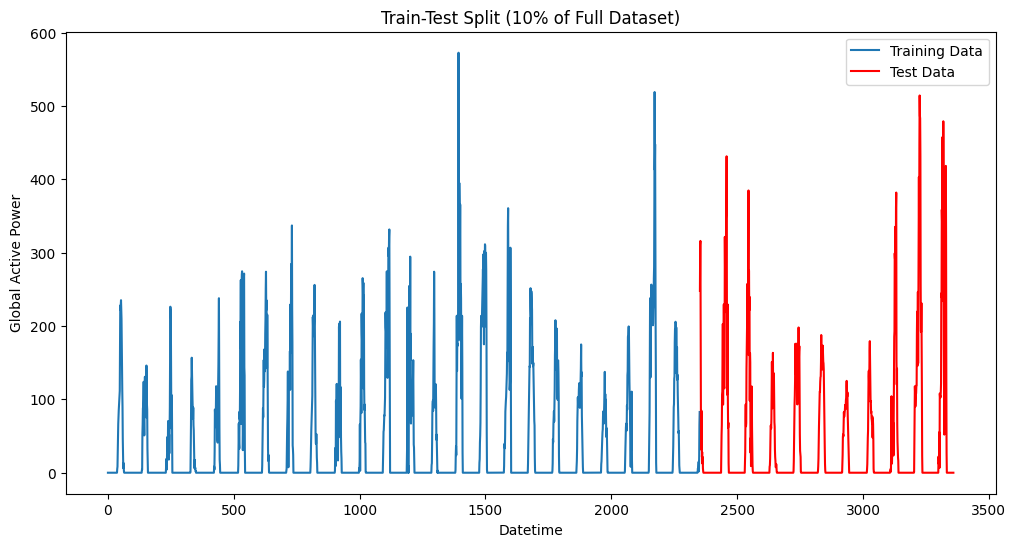

                               SARIMAX Results                                
Dep. Variable:       PV Productie (W)   No. Observations:                 2352
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11096.967
Date:                Sun, 16 Jun 2024   AIC                          22205.934
Time:                        19:19:51   BIC                          22240.510
Sample:                             0   HQIC                         22218.526
                               - 2352                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0360      0.007     -5.350      0.000      -0.049      -0.023
ar.L2         -0.0599      0.008     -7.650      0.000      -0.075      -0.045
ar.L3          0.0255      0.009      2.860      0.0

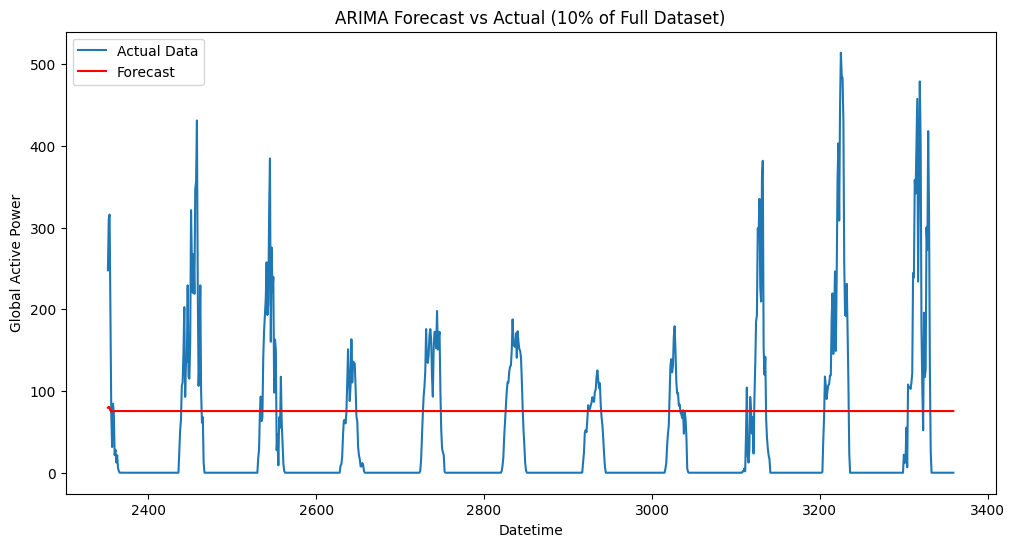

Mean Squared Error: 8330.262693509989


In [35]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

subset_df = df_pv_GHI.head(int(len(df_pv_GHI) * 0.1))

split_ratio = 0.7
split_point = int(len(subset_df) * split_ratio)
train, test = subset_df[:split_point], subset_df[split_point:]

train_series = train['PV Productie (W)']
test_series = test['PV Productie (W)']

plt.figure(figsize=(12, 6))
plt.plot(train_series, label='Training Data')
plt.plot(test_series, label='Test Data', color='red')
plt.title('Train-Test Split (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

model = ARIMA(train_series, order=(5, 1, 0))
model_fit = model.fit()

print(model_fit.summary())
forecast = model_fit.forecast(steps=len(test_series))

plt.figure(figsize=(12, 6))
plt.plot(test_series, label='Actual Data')
plt.plot(test_series.index, forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast vs Actual (10% of Full Dataset)')
plt.xlabel('Datetime')
plt.ylabel('Global Active Power')
plt.legend()
plt.show()

mse = mean_squared_error(test_series, forecast)
print(f'Mean Squared Error: {mse}')

## GRU

Num GPUs Available:  1
   PV Productie (W)  Month  Day  Hour  Minute  Weekday  GHI (W/m^2)
0               0.0     12   26     0       0        6          0.0
1               0.0     12   26     0      15        6          0.0
2               0.0     12   26     0      30        6          0.0
3               0.0     12   26     0      45        6          0.0
4               0.0     12   26     1       0        6          0.0
Shapes: X=(22647, 720, 7), y=(22647, 154)
Shapes: X=(9207, 720, 7), y=(9207, 154)
Epoch 1/20
354/354 [==============================] - 57s 148ms/step - loss: 0.2945
Epoch 2/20
354/354 [==============================] - 27s 78ms/step - loss: 0.0631
Epoch 3/20
354/354 [==============================] - 56s 158ms/step - loss: 0.0589
Epoch 4/20
354/354 [==============================] - 36s 102ms/step - loss: 0.0569
Epoch 5/20
354/354 [==============================] - 58s 163ms/step - loss: 0.0555
Epoch 6/20
354/354 [==============================] - 46s 130ms/step

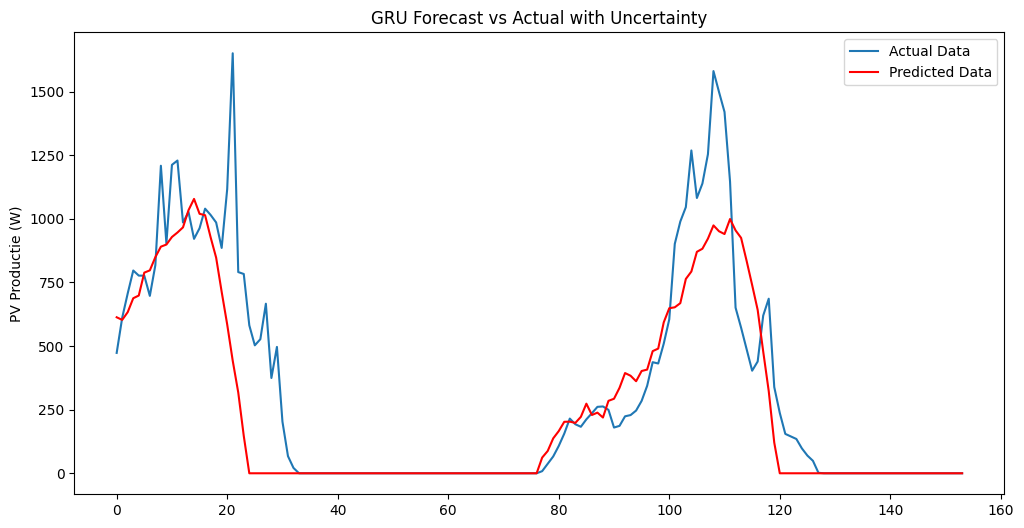

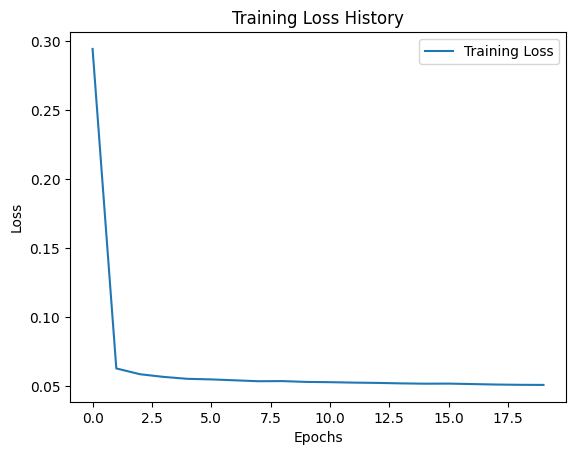

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, Bidirectional, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import L1L2
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

n_sequence_past = 720
n_ahead_prediction = 154

df_pv_GHI = pd.read_csv('core/static/data/2022_15min_data_with_GHI.csv', sep=',', low_memory=False)
subset_df = df_pv_GHI.head(int(len(df_pv_GHI) * 1))

df_pv_GHI = subset_df[['PV Productie (W)', 'Month', 'Day', 'Hour', 'Minute', 'Weekday', 'GHI (W/m^2)']]
print(df_pv_GHI.head())

split_ratio = 0.7
split_point = int(len(df_pv_GHI) * split_ratio)
train, test = df_pv_GHI[:split_point], df_pv_GHI[split_point:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

def create_sequences(data, seq_length, prediction_length):
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_length + 1):
        seq = data[i:(i + seq_length), :]  # Skip the first column for X
        label = data[(i + seq_length):(i + seq_length + prediction_length), 0]  # First column is the target
        X.append(seq)
        y.append(label)
    arrayX = np.array(X)
    arrayY = np.array(y)
    print(f"Shapes: X={arrayX.shape}, y={arrayY.shape}")
    return arrayX, arrayY


seq_length = n_sequence_past
prediction_length = n_ahead_prediction
X_train, y_train = create_sequences(train_scaled, seq_length, prediction_length)
X_test, y_test = create_sequences(test_scaled, seq_length, prediction_length)

model = Sequential([
    GRU(40, return_sequences=True, input_shape=(seq_length, train_scaled.shape[1]), kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.2),
    BatchNormalization(),
    GRU(80, return_sequences=False),
    Dropout(0.2),
    Dense(prediction_length, activation='relu')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

history = model.fit(X_train, y_train, epochs=20, batch_size=64)

y_pred = model.predict(X_test)

y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

dummy_features = np.zeros((y_test_reshaped.shape[0], train_scaled.shape[1] - 1))

y_test_inv = scaler.inverse_transform(np.concatenate((y_test_reshaped, dummy_features), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred_reshaped, dummy_features), axis=1))[:, 0]

mae = np.mean(np.abs(y_test_inv[:n_ahead_prediction] - y_pred_inv[:n_ahead_prediction]))
print(f'Mean Absolute Error: {mae}')

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:n_ahead_prediction], label='Actual Data')
plt.plot(y_pred_inv[:n_ahead_prediction], label='Predicted Data', color='red')

plt.title('GRU Forecast vs Actual')
plt.ylabel('PV Productie (W)')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 43ms/step
154
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         11.65109741
  0.          5.9578312   6.89151512  1.24551429  0.         24.04985664
  7.44862646 20.99836921  0.          4.7846577   0.          0.
  0.          0.  

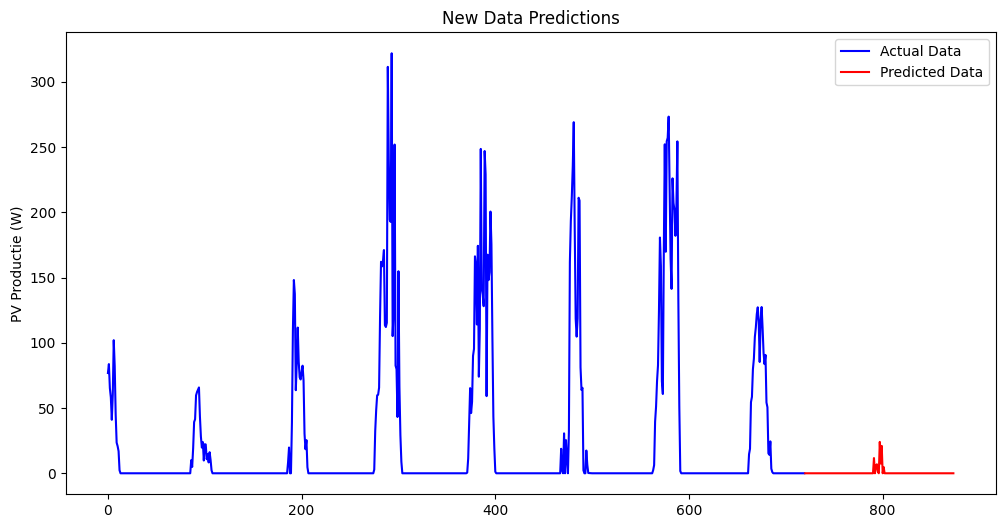

In [3]:
def create_new_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:(i + seq_length), :]
        X.append(seq)
    return np.array(X)

new_data = pd.read_csv('core/static/data/2022_15min_data_with_GHI.csv', sep=',', low_memory=False).tail(720)
new_data = new_data[['PV Productie (W)', 'Month', 'Day', 'Hour', 'Minute', 'Weekday', 'GHI (W/m^2)']]
new_data_scaled = scaler.transform(new_data)
X_new = create_new_sequences(new_data_scaled, seq_length)
y_new_pred_scaled = model.predict(X_new)
y_new_pred_reshaped = y_new_pred_scaled.reshape(-1, 1)
dummy_features_new = np.zeros((y_new_pred_reshaped.shape[0], train_scaled.shape[1] - 1))
y_new_pred_inv = scaler.inverse_transform(np.concatenate((y_new_pred_reshaped, dummy_features_new), axis=1))[:, 0]
input_sequence = new_data['PV Productie (W)'].values
plt.figure(figsize=(12, 6))
plt.plot(input_sequence, label='Actual Data', color='blue')
x_axis_for_pred = np.arange(len(input_sequence), len(input_sequence) + len(y_new_pred_inv))
print(len(y_new_pred_inv))
print(y_new_pred_inv)
plt.plot(x_axis_for_pred, y_new_pred_inv, label='Predicted Data', color='red')
plt.title('New Data Predictions')
plt.ylabel('PV Productie (W)')
plt.legend()
plt.show()

## LSTM

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.regularizers import L1L2
from keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

n_sequence_past = 720
n_ahead_prediction = 154 

df_pv_GHI = pd.read_csv('core/static/data/2022_15min_data_with_GHI.csv', sep=',', low_memory=False)
subset_df = df_pv_GHI.head(int(len(df_pv_GHI) * 1))

df_pv_GHI = subset_df[['PV Productie (W)', 'Month', 'Day', 'Hour', 'Minute', 'Weekday', 'GHI (W/m^2)']]
print(df_pv_GHI.head())

split_ratio = 0.7
split_point = int(len(df_pv_GHI) * split_ratio)
train, test = df_pv_GHI[:split_point], df_pv_GHI[split_point:]

scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

def create_sequences(data, seq_length, prediction_length):
    X, y = [], []
    for i in range(len(data) - seq_length - prediction_length + 1):
        seq = data[i:(i + seq_length), :]  # Skip the first column for X
        label = data[(i + seq_length):(i + seq_length + prediction_length), 0]  # First column is the target
        X.append(seq)
        y.append(label)
    arrayX = np.array(X)
    arrayY = np.array(y)
    print(f"Shapes: X={arrayX.shape}, y={arrayY.shape}")
    return arrayX, arrayY


seq_length = n_sequence_past
prediction_length = n_ahead_prediction
X_train, y_train = create_sequences(train_scaled, seq_length, prediction_length)
X_test, y_test = create_sequences(test_scaled, seq_length, prediction_length)

model = Sequential([
    LSTM(40, return_sequences=True, input_shape=(seq_length, train_scaled.shape[1]), kernel_regularizer=L1L2(l1=0.01, l2=0.01)),
    Dropout(0.2),
    BatchNormalization(),
    LSTM(80, return_sequences=False),
    Dropout(0.2),
    Dense(prediction_length, activation='relu')
])
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mae')

history = model.fit(X_train, y_train, epochs=20, batch_size=64)

model.save('core/static/data/lstm_model_pv.h5')

y_pred = model.predict(X_test)

y_test_reshaped = y_test.reshape(-1, 1)
y_pred_reshaped = y_pred.reshape(-1, 1)

dummy_features = np.zeros((y_test_reshaped.shape[0], train_scaled.shape[1] - 1))

y_test_inv = scaler.inverse_transform(np.concatenate((y_test_reshaped, dummy_features), axis=1))[:, 0]
y_pred_inv = scaler.inverse_transform(np.concatenate((y_pred_reshaped, dummy_features), axis=1))[:, 0]

mae = np.mean(np.abs(y_test_inv[:n_ahead_prediction] - y_pred_inv[:n_ahead_prediction]))
print(f'Mean Absolute Error: {mae}')

plt.figure(figsize=(12, 6))
plt.plot(y_test_inv[:n_ahead_prediction], label='Actual Data')
plt.plot(y_pred_inv[:n_ahead_prediction], label='Predicted Data', color='red')

plt.title('LSTM Forecast vs Actual')
plt.ylabel('PV Productie (W)')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.title('Training Loss History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Num GPUs Available:  0
   PV Productie (W)  Month  Day  Hour  Minute  Weekday  GHI (W/m^2)
0               0.0     12   26     0       0        6          0.0
1               0.0     12   26     0      15        6          0.0
2               0.0     12   26     0      30        6          0.0
3               0.0     12   26     0      45        6          0.0
4               0.0     12   26     1       0        6          0.0
Shapes: X=(22647, 720, 7), y=(22647, 154)
Shapes: X=(9207, 720, 7), y=(9207, 154)


C:\Users\jonah\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 235s 658ms/step - loss: 0.6255
Epoch 2/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 251s 708ms/step - loss: 0.0609
Epoch 3/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 255s 721ms/step - loss: 0.0575
Epoch 4/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 240s 679ms/step - loss: 0.0565
Epoch 5/20
354/354 ━━━━━━━━━━━━━━━━━━━━ 239s 674ms/step - loss: 0.0549
Epoch 6/20
117/354 ━━━━━━━━━━━━━━━━━━━━ 2:33 646ms/step - loss: 0.0548

KeyboardInterrupt: 

1/1 [==============================] - 0s 38ms/step
154
[ 0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          3.29079219 10.45436823 30.84487972
 37.00599418 38.7736765  56.72930695 56.81322021 67.25992822 63.42741699
 82.76819126 87.46512612 72.81477657 83.31450026 78.43248798 87.71501759
 70.85556829 67.28216954 50.86981609 22.54863896 21.25303548 10.15880297
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  

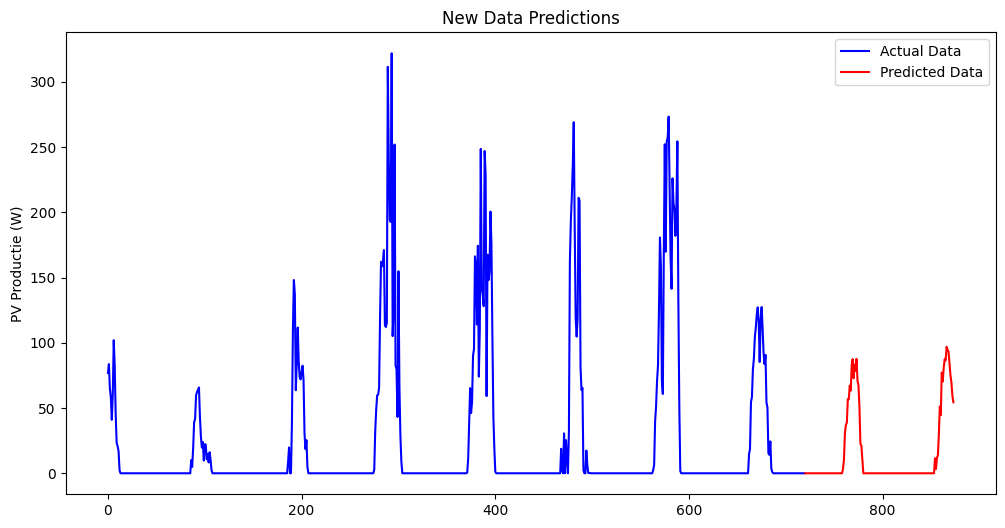

In [5]:
def create_new_sequences(data, seq_length):
    X = []
    for i in range(len(data) - seq_length + 1):
        seq = data[i:(i + seq_length), :]
        X.append(seq)
    return np.array(X)

new_data = pd.read_csv('core/static/data/2022_15min_data_with_GHI.csv', sep=',', low_memory=False).tail(720)
new_data = new_data[['PV Productie (W)', 'Month', 'Day', 'Hour', 'Minute', 'Weekday', 'GHI (W/m^2)']]
new_data_scaled = scaler.transform(new_data)
X_new = create_new_sequences(new_data_scaled, seq_length)
y_new_pred_scaled = model.predict(X_new)
y_new_pred_reshaped = y_new_pred_scaled.reshape(-1, 1)
dummy_features_new = np.zeros((y_new_pred_reshaped.shape[0], train_scaled.shape[1] - 1))
y_new_pred_inv = scaler.inverse_transform(np.concatenate((y_new_pred_reshaped, dummy_features_new), axis=1))[:, 0]
input_sequence = new_data['PV Productie (W)'].values
plt.figure(figsize=(12, 6))
plt.plot(input_sequence, label='Actual Data', color='blue')
x_axis_for_pred = np.arange(len(input_sequence), len(input_sequence) + len(y_new_pred_inv))
print(len(y_new_pred_inv))
print(y_new_pred_inv)
plt.plot(x_axis_for_pred, y_new_pred_inv, label='Input Data', color='red')
plt.title('New Data Predictions')
plt.ylabel('PV Productie (W)')
plt.legend()
plt.show()